# HW on CNN
---

Study the following example, which uses a "hand-made" CNN to classify cells

1. Try to improve the validation accuracy from teh current value of 73% by:

+ using a feedforward network
+ using more convolutional layers
+ using densenet (lookup tensorflow documentation)
+ using alexnet (lookup tensorflow documentation)


2. Comment on the accuracy achieved vs the number of trainable parameters in the model


In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import glob
import tqdm

2023-02-27 10:53:42.663689: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-27 10:53:42.663719: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-27 10:53:43.940398: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 10:53:43.940485: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 10:53:43.940497: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
import PIL
import numpy as np
from PIL import Image
from numpy import asarray
# Open the image form working directory
from tqdm import tqdm



In [3]:
def getData(num_samples=500,PATHS=['../datasets/cells/all/*bmp','../datasets/cells/hem/*bmp']):
    count=0
    FILES={}
    LEN=np.zeros(2,)
    for i in PATHS:
        FILES[count]=glob.glob(i)
        LEN[count]=len(FILES[count])
        count=count+1
    print('Number in each class: ',LEN)

    INDEX_ARRAY={}
    for i in np.arange(len(PATHS)):
        INDEX_ARRAY[i]=np.random.permutation(int(LEN[i]))

    print(INDEX_ARRAY[0])

    NUM_TRAINING=10
    TOTAL_NUMBER_OF_EXAMPLES=np.floor(np.array(LEN).astype(int)*.1).astype(int)
    TOTAL_NUMBER_OF_VALIDATION_EXAMPLES=np.array(num_samples-TOTAL_NUMBER_OF_EXAMPLES).astype(int)
    print(TOTAL_NUMBER_OF_EXAMPLES,TOTAL_NUMBER_OF_VALIDATION_EXAMPLES)

    ar_tr = np.zeros([TOTAL_NUMBER_OF_EXAMPLES.sum(),450,450, 3], dtype=np.uint8)
    label_tr=np.empty((TOTAL_NUMBER_OF_EXAMPLES.sum(),), dtype='uint8')
    ar_ts = np.zeros([TOTAL_NUMBER_OF_VALIDATION_EXAMPLES.sum(),450,450, 3], dtype=np.uint8)
    label_ts=np.empty((TOTAL_NUMBER_OF_VALIDATION_EXAMPLES.sum(),), dtype='uint8')

    num=0
    for i in np.arange(len(PATHS)):
        for f in tqdm(np.array(FILES[i])[INDEX_ARRAY[i][:TOTAL_NUMBER_OF_EXAMPLES[i]]]):
            image = Image.open(f)
            data = asarray(image)
            ar_tr[num,:,:,:]=data
            label_tr[num]=i
            num=num+1
    plt.figure()
    plt.imshow(ar_tr[2,:,:,0])
    plt.figure()
    plt.imshow(ar_tr[TOTAL_NUMBER_OF_EXAMPLES[0]+2,:,:,0]);    
    
    
    num=0
    for i in np.arange(len(PATHS)):
        for f in tqdm(np.array(FILES[i])[INDEX_ARRAY[i][TOTAL_NUMBER_OF_EXAMPLES[i]:num_samples]]):
            image = Image.open(f)
            data = asarray(image)
            ar_ts[num,:,:,:]=data
            label_ts[num]=i
            num=num+1
    plt.figure()
    plt.imshow(ar_ts[2,:,:,0])
    plt.figure()
    plt.imshow(ar_ts[TOTAL_NUMBER_OF_VALIDATION_EXAMPLES[0]+2,:,:,0]);    
    
    
    
    x_train=ar_tr
    x_test=ar_ts
    y_train=label_tr
    y_test=label_ts
    return (x_train, y_train), (x_test, y_test)

  4%|███▏                                                                               | 9/239 [00:00<00:02, 80.62it/s]

Number in each class:  [2397. 1130.]
[2153  419  803 ...  645  988  933]
[239 113] [261 387]


100%|████████████████████████████████████████████████████████████████████████████████| 387/387 [00:02<00:00, 164.47it/s]


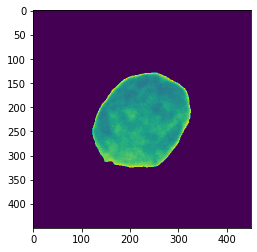

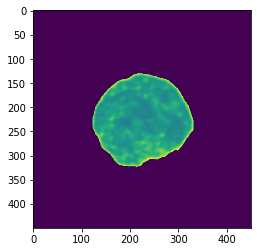

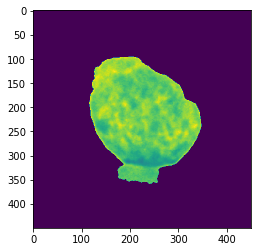

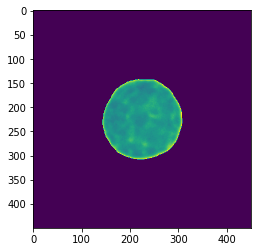

In [4]:
(train_images, train_labels), (test_images, test_labels)=getData(500)

In [5]:
print(train_images.shape,len(train_labels))
print(test_images.shape,len(test_labels))

(352, 450, 450, 3) 352
(648, 450, 450, 3) 648


In [6]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
class_names = ['abnormal','normal']



In [9]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(450, 450, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2,activation=tf.nn.softmax))

2023-02-27 10:55:10.053683: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 389316608 exceeds 10% of free system memory.
2023-02-27 10:55:10.170991: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 389316608 exceeds 10% of free system memory.


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 448, 448, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 224, 224, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 flatten_1 (Flatten)         (None, 760384)           

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=3, 
                    validation_data=(test_images, test_labels))

Epoch 1/3


/home/ishanu/.local/lib/python3.7/site-packages/keras/backend.py:5586: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "sparse_categorical_crossentropy"


11/11 [==============================] - 163s 12s/step - loss: 0.7581 - accuracy: 0.7528 - val_loss: 0.6279 - val_accuracy: 0.7114
Epoch 2/3
11/11 [==============================] - 138s 11s/step - loss: 0.3857 - accuracy: 0.8409 - val_loss: 0.6603 - val_accuracy: 0.7022
Epoch 3/3
11/11 [==============================] - 124s 12s/step - loss: 0.2778 - accuracy: 0.8920 - val_loss: 0.5490 - val_accuracy: 0.7330


21/21 - 40s - loss: 0.5490 - accuracy: 0.7330 - 40s/epoch - 2s/step


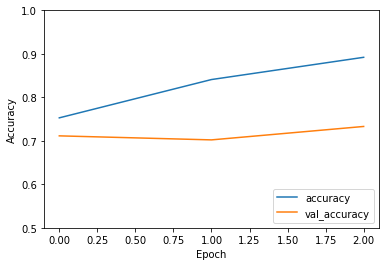

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [13]:
history.history

{'loss': [0.7581395506858826, 0.38565129041671753, 0.27777233719825745],
 'accuracy': [0.7528409361839294, 0.8409090638160706, 0.8920454382896423],
 'val_loss': [0.6279012560844421, 0.66028892993927, 0.5490272641181946],
 'val_accuracy': [0.7114197611808777, 0.7021604776382446, 0.7330247163772583]}